# Torah scraping

### Looking for hidden patterns.
### and not so hidden patterns.
### 2020-4-21
### Joe Hostyk and Alex Zaloum

In [19]:
import csv
from IPython.display import display, clear_output
import os
import itertools
from collections import defaultdict, Counter

import matplotlib
# matplotlib.use('TKAgg')
import matplotlib.pyplot as plt

import spacy
import re

In [11]:
GMATRIA = {"א": 1, "ב": 2, "ג": 3, "ד": 4, "ה": 5, "ו": 6, "ז": 7, "ח": 8, "ט": 9, "י": 10, "כ": 20, "ך": 20, "ל": 30, "מ": 40, "ם": 40, "נ": 50, "ן": 50, "ס": 60, "ע": 70, "פ": 80, "ף": 80, "צ": 90, "ץ": 90, "ק": 100, "ר": 200, "ש": 300, "ת": 400}
ALEPH_BEIS = GMATRIA.keys()

In [12]:
## todo: sofit letters
## Define the otiyot categories
## Different breakdowns?

### Load texts

In [13]:
def getFileNames(folder):
    """
    Get all our file names for processing later.
    Currently, doesn't recursively search.

    Args:
        folder (str): Full path to the folder.

    Returns:
        filenames (list of strings)
    """

    print ("Getting filenames...")

    filenames = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if ".txt" in file:
                filenames.append(os.path.join(root, file))
    return filenames

def makeWordDictionaryFromSefer(filename):
    
    seferWords = Counter()
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    seferWords[word] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return seferWords


def makeLetterDictionaryFromSefer(filename, allLetters):
    
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    for letter in word:
                        allLetters[letter] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return allLetters  

def makeNgramsDictionaryFromSefer(filename, allNgrams, sizeOfngram):
    
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    for letterIndex in range(len(word) - sizeOfngram + 1):
    
                        ngram = word[letterIndex:letterIndex + sizeOfngram]
                        allNgrams[ngram] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return allNgrams  

def getAllFiles(filenames):
    
    allWords = {}
    allLetters = Counter()
    allNgrams = Counter()
    
    for filename in filenames:
        
        seferName = filename.replace(".txt", "").split("/")[-1]
        print(seferName)
#         allWords[seferName] = makeDictionaryFromSefer(filename)
#         allLetters = makeLetterDictionaryFromSefer(filename, allLetters)
        allNgrams = makeNgramsDictionaryFromSefer(filename, allNgrams, sizeOfngram = 2)

#         raise
    return allNgrams
        
     

In [2]:
folder = "./texts"
filenames = getFileNames(folder)
# allWords = getAllFiles(filenames)
# allLetters = getAllFiles(filenames)
allNgrams = getAllFiles(filenames)

### Check which pairs never show up in the Torah

In [69]:
allPossiblePairs = list(itertools.product(ALEPH_BEIS, ALEPH_BEIS))
allPossiblePairs = ["".join(pair) for pair in allPossiblePairs]
# allPossiblePairs

In [70]:
print([pair for pair in allPossiblePairs if pair not in allNgrams])

['בף', 'גט', 'גכ', 'גס', 'גצ', 'גץ', 'גק', 'דז', 'דט', 'דס', 'דצ', 'דץ', 'הף', 'הץ', 'זט', 'זס', 'זף', 'זצ', 'זץ', 'זש', 'חא', 'חע', 'טג', 'טז', 'טכ', 'טס', 'טצ', 'טץ', 'טק', 'כץ', 'ךא', 'ךב', 'ךג', 'ךד', 'ךה', 'ךו', 'ךז', 'ךח', 'ךט', 'ךי', 'ךכ', 'ךך', 'ךל', 'ךמ', 'ךם', 'ךנ', 'ךן', 'ךס', 'ךע', 'ךפ', 'ךף', 'ךצ', 'ךץ', 'ךק', 'ךר', 'ךש', 'ךת', 'מף', 'םא', 'םב', 'םג', 'םד', 'םה', 'םו', 'םז', 'םח', 'םט', 'םי', 'םכ', 'םך', 'םל', 'םמ', 'םם', 'םנ', 'םן', 'םס', 'םע', 'םפ', 'םף', 'םצ', 'םץ', 'םק', 'םר', 'םש', 'םת', 'ןא', 'ןב', 'ןג', 'ןד', 'ןה', 'ןו', 'ןז', 'ןח', 'ןט', 'ןי', 'ןכ', 'ןך', 'ןל', 'ןמ', 'ןם', 'ןנ', 'ןן', 'ןס', 'ןע', 'ןפ', 'ןף', 'ןצ', 'ןץ', 'ןק', 'ןר', 'ןש', 'ןת', 'סז', 'סט', 'סצ', 'סץ', 'סש', 'עח', 'עע', 'עף', 'פב', 'פפ', 'ףא', 'ףב', 'ףג', 'ףד', 'ףה', 'ףו', 'ףז', 'ףח', 'ףט', 'ףי', 'ףכ', 'ףך', 'ףל', 'ףמ', 'ףם', 'ףנ', 'ףן', 'ףס', 'ףע', 'ףפ', 'ףף', 'ףצ', 'ףץ', 'ףק', 'ףר', 'ףש', 'ףת', 'צז', 'צס', 'צש', 'ץא', 'ץב', 'ץג', 'ץד', 'ץה', 'ץו', 'ץז', 'ץח', 'ץט', 'ץי', 'ץכ', 'ץך', 'ץל', 'ץמ', 'ץם

### What are the most common pairs in the Torah?

In [71]:
allNgrams.most_common(5)

[('את', 5543), ('וי', 4352), ('אל', 4090), ('ים', 3970), ('יה', 3734)]

In [72]:
### Most common:
allNgrams.most_common(575)

### Least common:
allNgrams.most_common(575)[-30:]

[('טד', 5),
 ('סס', 5),
 ('קא', 4),
 ('כט', 4),
 ('קף', 4),
 ('זם', 4),
 ('חף', 3),
 ('א\u200d', 3),
 ('\u200dש', 3),
 ('זך', 3),
 ('שף', 3),
 ('עס', 3),
 ('זח', 3),
 ('קק', 3),
 ('אט', 3),
 ('פמ', 3),
 ('נץ', 2),
 ('תץ', 2),
 ('לץ', 2),
 ('פף', 2),
 ('זפ', 2),
 ('צץ', 2),
 ('טט', 1),
 ('אץ', 1),
 ('סן', 1),
 ('אא', 1),
 ('צט', 1),
 ('קכ', 1),
 ('הך', 1),
 ('זג', 1)]

(array([27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([    3,    70,    70,   830,  1035,  1806,  1836,  2111,  2199,
         2937,  3358,  3976,  4260,  4700,  7039,  7194,  8614,  9889,
        10630, 11270, 14474, 15605, 16357, 17965, 18147, 21583, 27069,
        28085, 30596, 31607]),
 <a list of 29 Patch objects>)

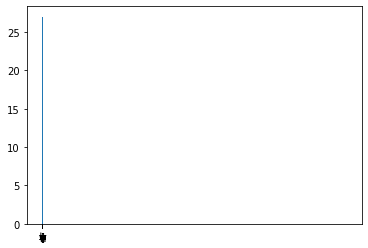

In [73]:
sortedLetters = {k: v for k, v in sorted(allLetters.items(), key=lambda item: item[1])}

plt.hist(list(sortedLetters.keys()), list(sortedLetters.values()))

### Heatmap

In [ ]:
### Todo: make a heatmap of 24x24 letters


### Get gmatrias:

In [4]:
def gmatrifyAword(word):
    """
    Get the gmatria for one word. Doesn't catch punctuation/errors.

    Args:
        word (str)

    Returns:
        The gmatria (int)

    """

    return sum([GMATRIA[letter] for letter in word])

# Numbers, to words with that gmatria

def getGmatrias():
    
    gmatriasToWords = {}

    directory = "./texts/"

    if not os.path.exists(directory):
        os.mkdir("./texts")
    
    pathToGmatriaFile = "{}bamidbarGmatriaByNumber.tsv".format(directory)

    if os.path.exists(pathToGmatriaFile):
        print ("Gmatria file exists. Reading...")
        reader = csv.reader(open(pathToGmatriaFile), delimiter = "\t")
        header = next(reader)
        for line in reader:
            line = dict(zip(header, line))
            word = int(line["Gmatria"])
            shifts = set(line["Word"].split(" | "))
            gmatriasToWords[word] = shifts
        print ("Finished reading.")
    ### To-do: fill this in later
#     else:
#         print ("Gmatria file does not exist. Creating...")
#         with open(pathToGmatriaFile, "w") as out:

#             out.write("Gmatria\tWord\n")

#             
    return gmatriasToWords

In [5]:
gmatriasToWords = getGmatrias()
gmatriasToWords[220]

Gmatria file exists. Reading...
Finished reading.


{'הארדי', 'וטהר', 'וידר', 'וירד', 'ורוח', 'טהור', 'יבחר', 'צפים', 'רוחו'}

## Unique words

In [13]:
folder = "texts/Torah"
filenames = getFileNames(folder)

sfarimToWords = {}
for filename in filenames:
    
    seferName = filename.replace(".txt", "").split("/")[-1]
    print(seferName)
    wordsInSefer = makeWordDictionaryFromSefer(filename)
    sfarimToWords[seferName] = wordsInSefer

Getting filenames...
vayikra
dvarim
breishit
shmot
bamidbar


In [24]:
sfarim = set(sfarimToWords)
combos = itertools.combinations(sfarim, 2)
for sefer1, sefer2 in combos:

    sefer1words = set(sfarimToWords[sefer1])
    sefer2words = set(sfarimToWords[sefer2])

#     print ("{} has {} words.".format(sefer1, len(sefer1words)))
#     print ("{} has {} words.".format(sefer2, len(sefer2words)))
    print ("{} and {} share {} words.".format(sefer1, sefer2, len(sefer1words.intersection(sefer2words))))
#     print ("{} has {} unique words.".format(sefer1, len(sefer1words.difference(sefer2words))))
#     print ("{} has {} unique words.".format(sefer2, len(sefer2words.difference(sefer1words))))


bamidbar has 3847 words.
bamidbar and dvarim share 1201 words.
bamidbar has 3847 words.
bamidbar and shmot share 1412 words.
bamidbar has 3847 words.
bamidbar and vayikra share 973 words.
bamidbar has 3847 words.
bamidbar and breishit share 1323 words.
dvarim has 4089 words.
dvarim and shmot share 1302 words.
dvarim has 4089 words.
dvarim and vayikra share 858 words.
dvarim has 4089 words.
dvarim and breishit share 1313 words.
shmot has 4171 words.
shmot and vayikra share 1007 words.
shmot has 4171 words.
shmot and breishit share 1482 words.
vayikra has 2710 words.
vayikra and breishit share 860 words.


### Basic histogram/breakdowns:
    
#### Letters, pairs of letters

In [ ]:
allWords
for 

### LDA:

# Talmud

In [14]:
## Load:
folder = "texts/Talmud"
masechetFilenames = getFileNames(folder)
print ("There are {} masechtot.".format(len(masechetFilenames)))

Getting filenames...
There are 37 masechtot.


In [32]:
# yikes
def masechetFromFilename(masechetFilename):
    
    splitName = masechetFilename.split("/")
    nextIndex = splitName.index("English")
    masechetName = splitName[nextIndex - 1]
    
    return masechetName

Ran the spaCy code below to get all people in the Talmud. That had lots of false positives (e.g. "Leviticus 8:11", "chews ginger"), so took all lines with "Rav", "Rabb", and "The" in them, to get most of the true hits.
(Missing people like "Berurya" or "Ḥoni HaMe’aggel" with this, though.)

In [66]:
### This was from looking through the first few masechtot manually.
# manualRabbis = set(["Hillel", "Rabbi Akiva", "Rabbi Ami", "Rabbi Shimon", "Shammai", "The Sages", "Abba Shaul", "Rabbi Yannai", "Rabbi Yehuda ben Agra", "Rav Ashi", "Rabbi Elazar, son of Rabbi Tzadok", "Rabbi Shimon ben Lakish", "Reish Lakish", "Rav Naḥman bar Yitzḥak", "Beit Hillel", "Rabbi Ḥanina", "Rabbi Yehuda", "Rabbi Elazar ben Azarya", "Rav Dimi", "Rabbi Shimon ben Elazar", "Rav Yosef", "Rav Huna bar Taḥlifa", "Rabbi Yishmael, son of Rabbi Yosei", "Rav Pappa", "Rabbi Abbahu", "Rabbi Yirmeya", "Rav Aḥa, son of Rava", "Rabbi Yitzḥak, son of Rabbi Bisna", "Rabbi Ḥanina ben Gamliel", "Rav Huna, son of Rav Natan", "Rabbi Yoḥanan", "Rava", "Rav Naḥman", "Beit Shammai", "Rabbi Yosei", "Rav Sheshet", "Rav Ḥiyya, son of Rav Huna", "Rabbi Eliezer", "Rav Ḥinnana bar Shelamya", "Rav Aḥa, son of Rav Yosef", "Rav Adda", "Rabban Gamliel", "Rabbi Neḥemya", "Rav Ḥanilai", "Rabbi Yehuda ben Bava", "Rabbi Abba bar Memel", "Rav Ḥanan from Neharde’a", "Rabbi Eliezer, son of Rabbi Tzadok", "Rav Huna, son of Rav Yehoshua", "Rabbi Yosei ben Keifar", "Shmuel", "Levi", "Rabbi Eliezer ben Ya’akov", "Rav Shimi bar Ḥiyya", "Rav Pineḥas", "Rav Shemaya", "Rabbi Amram", "Rav Huna", "Rav Ḥanina bar Shelamya", "Abaye", "Rav Aḥa, son of Rav Yeiva", "Rabbi Meir", "Rabbi Zeira", "Rabbi Yehoshua ben Levi", "Rabbi Yoḥanan ben Nuri", "Ameimar", "Rabbi Ḥanina ben Antigonus", "Rav Yehuda of Diskarta", "Rabbi Yehoshua", "Rav Shmuel bar Yeiva", "Rabbi Natan bar Yosef", "Rav Kahana", "Rav Huna bar Ḥiyya", "Rabbi Elazar", "Rabbi Yehoshua ben Ḥananya", "Ze’eiri", "Ami of Vardina", "Rav Yitzḥak, son of Rav Yehuda", "Rabba bar bar Ḥana", "Rabba bar bar Ḥana", "Rabbi Yishmael", "Ḥasa", "Ḥizkiya", "Ravin", "Rav Giddel", "Ḥananya ben Ḥizkiya", "Aḥer", "Rav Ḥiyya bar Abba", "Yosei ben Yo’ezer", "Yosef ben Yoḥanan", "Yehoshua ben Peraḥya", "Nitai HaArbeli", "Yehuda ben Tabbai", "Shimon ben Shataḥ", "Shemaya", "Avtalyon", "Rabbi Ila", "Rabbi Asi", "Rabbi Ḥiyya bar Abba", "Rav Sheizevi", "Rav Pinḥas", "Rabbi Musya, grandson of Rabbi Masya", "Rav Ḥisda", "Rav Shimi from Neharde’a", "Rav Yitzḥak", "Rabbi Sheila", "Rabban Yoḥanan ben Zakkai", "Isi ben Akiva", "Isi ben Yehuda", "Yosef of Hutzal", "Rav Mordekhai", "Rabbi Yoshiya", "Rav Ḥisda", "Rav Zutra bar Toviya", "Mar Zutra", "Rav Mattana", "Rav Yehuda", "Rabbi Abba", "Hanani", "Rabba bar Lima", "Rav Aḥa bar Ya’akov", "Rabba bar Avuh", "Rabbi Natan"])

rabbis = set([person.strip() for person in open("RavRabbThe.txt", "r")])
print("Working with {} rabbis from the Talmud.".format(len(rabbis)))


Working with 1666 rabbis from the Talmud.


In [67]:
nlp = spacy.load('en_core_web_sm')
lineNumber = 0
people = set()
rabbisToMasechet = defaultdict(Counter)
masechetToRabbis = defaultdict(Counter)

for filename in masechetFilenames:
    
    masechetName = masechetFromFilename(filename)
    print ("\r{}\r".format(masechetName))
    reader = open(filename, "r")
    for line in reader:
        
        ### Skip the header info, and the whitespace/daf numbers
        lineNumber += 1
        if lineNumber < 21 or len(line) < 13:
            continue
        line = re.sub('<[^<]+?>', '', line) # ayy https://stackoverflow.com/a/4869782

        ### Incredible https://spacy.io/usage/linguistic-features#named-entities
        doc = nlp(line)            
        for entity in doc.ents:
            
            ### First pass: get all the people (lots of false positives):
#             if entity.label_ == "PERSON" and entity.text in rabbis:
#                 people.add(entity)
                
            ### Next round: use that to make an edited list:
            if entity.label_ == "PERSON" and entity.text in rabbis:
                rabbisToMasechet[entity.text][masechetName] += 1
                masechetToRabbis[masechetName][entity.text] += 1

Niddah
Chagigah
Yoma
Rosh Hashanah
Moed Katan
Beitzah
Sukkah
Megillah
Taanit
Pesachim
Shabbat
Eruvin
Berakhot
Horayot
Avodah Zarah
Bava Batra
Shevuot
Sanhedrin
Bava Metzia
Bava Kamma
Makkot
Sotah
Kiddushin
Nazir
Yevamot
Gittin
Ketubot
Nedarim
Zevachim
Meilah
Bekhorot
Temurah
Keritot
Menachot
Arakhin
Chullin
Tamid


In [44]:
# peopleToText = {name.text for name in people}
# with open("talmudPeople.txt", "w") as out:
#     out.write("\n".join(peopleToText))

### Exact Matching (without spaCy)

Alternative (quicker) way that doesn't use spaCy, so it doesn't do true entity recognition and just searches for any matches. Runs instantly, but counts "Rav" a bunch because it counts "Rav x" for Rav as well.

In [68]:
# rabbisToMasechet = defaultdict(Counter)
# masechetToRabbis = defaultdict(Counter)

# for filename in masechetFilenames:
        
#     masechetName = masechetFromFilename(filename)
#     print ("\r{}\r".format(masechetName))
#     with open(filename, "r") as masechet:
        
#         text = masechet.read()
#         for rabbi in rabbis:
#             appearances = text.count(rabbi)
            
#             if appearances != 0:
#                 rabbisToMasechet[rabbi][masechetName] += appearances
#                 masechetToRabbis[masechetName][rabbi] += appearances
                            

In [69]:
print(rabbisToMasechet)

defaultdict(<class 'collections.Counter'>, {'Rabbi Ḥanina': Counter({'Shabbat': 92, 'Berakhot': 88, 'Sanhedrin': 79, 'Chullin': 72, 'Ketubot': 68, 'Yoma': 61, 'Niddah': 59, 'Bava Batra': 56, 'Menachot': 55, 'Pesachim': 40, 'Avodah Zarah': 37, 'Sotah': 37, 'Eruvin': 35, 'Gittin': 31, 'Bekhorot': 30, 'Bava Metzia': 29, 'Bava Kamma': 29, 'Zevachim': 29, 'Taanit': 28, 'Megillah': 25, 'Kiddushin': 25, 'Arakhin': 25, 'Yevamot': 24, 'Nedarim': 18, 'Temurah': 18, 'Keritot': 15, 'Sukkah': 14, 'Nazir': 12, 'Shevuot': 11, 'Moed Katan': 8, 'Rosh Hashanah': 6, 'Beitzah': 6, 'Meilah': 5, 'Horayot': 2, 'Chagigah': 1, 'Makkot': 1}), 'Rabbi Shimon': Counter({'Menachot': 391, 'Zevachim': 315, 'Shabbat': 293, 'Chullin': 253, 'Yevamot': 214, 'Bekhorot': 179, 'Sanhedrin': 174, 'Pesachim': 162, 'Temurah': 161, 'Bava Kamma': 149, 'Niddah': 132, 'Eruvin': 126, 'Shevuot': 125, 'Bava Metzia': 124, 'Ketubot': 99, 'Beitzah': 97, 'Yoma': 90, 'Kiddushin': 89, 'Bava Batra': 83, 'Horayot': 70, 'Nazir': 68, 'Keritot':

In [70]:
print(masechetToRabbis)

defaultdict(<class 'collections.Counter'>, {'Niddah': Counter({'Rabbi Yoḥanan': 245, 'Rabbi Eliezer': 211, 'Rabbi Meir': 200, 'Rav': 190, 'Rabbi Yosei': 172, 'Rabbis': 169, 'Rabbi Yehuda': 164, 'Rabbi Yehuda HaNasi': 154, 'Rabbi Shimon': 132, 'Rava': 108, 'Rav Yehuda': 93, 'Rabbi Yehoshua': 89, 'Rav Huna': 78, 'Rabbi Elazar': 74, 'Rav Pappa': 73, 'Rabbi Ḥanina': 59, 'Rabbi Zeira': 59, 'Rabbi Ḥiyya': 54, 'Rabbi Yishmael': 52, 'Rabbi Akiva': 50, 'Rav Yosef': 45, 'Rav Ashi': 40, 'Rav Ḥisda': 37, 'Rabbi Yannai': 32, 'Rabbi Yitzḥak': 30, 'Rabbi Yehoshua ben Levi': 28, 'Shimon ben Gamliel': 27, 'Rabbi Yirmeya': 27, 'Rav Yitzḥak': 26, 'Rabbi Ami': 24, 'Rav Sheshet': 23, 'Rabbi Tzadok': 22, 'Rabba': 21, 'Rabbi Abbahu': 20, 'Rabbi Oshaya': 19, 'Rabban Shimon ben Gamliel': 19, 'Rabbi Neḥemya': 19, 'Rabbi Shimon ben Yoḥai': 18, 'Ravina': 17, 'Rav Asi': 17, 'Rav Yirmeya': 17, 'Rabbi Shimon ben Elazar': 17, 'Rabban Gamliel': 16, 'Rav Kahana': 16, 'Rav Ketina': 15, 'Rabbi Ḥanina ben Antigonus': 14, 

In [78]:
def formattedCounts(counts):
    
    formatted = "\t" + "; ".join(["{}: {}".format(value, count) for value, count in counts])
    return formatted
    
rabbi = "Rabbi Yehuda"
masechet = "Berakhot"### Most common:

print("{}'s most common:\n".format(rabbi), formattedCounts(rabbisToMasechet[rabbi].most_common(5)))
print("{}'s most common:\n".format(masechet), formattedCounts(masechetToRabbis[masechet].most_common(5)))
print()

### Least common:

print("{}'s least common:\n".format(rabbi), formattedCounts(rabbisToMasechet[rabbi].most_common()[-5:]))
print("{}'s least common:\n".format(masechet), formattedCounts(masechetToRabbis[masechet].most_common()[-10:]))

Rabbi Yehuda's most common:
 	Shabbat: 446; Pesachim: 409; Chullin: 406; Eruvin: 395; Menachot: 322
Berakhot's most common:
 	Rabbi Yoḥanan: 292; Rabbi Yehuda: 222; Rav: 219; Rava: 122; Rabbi Yosei: 110

Rabbi Yehuda's least common:
 	Horayot: 48; Rosh Hashanah: 40; Chagigah: 37; Meilah: 16; Tamid: 2
Berakhot's least common:
 	Rav Sama: 1; Rabbi Yosei bar Yehuda: 1; Rabbi Parnakh: 1; Rav Huna bar Berekhya: 1; Rabbi Elazar HaKappar: 1; Rabbi Yosei ben Keifar: 1; Zekharya ben Kevutal: 1; Zekharya ben: 1; the Sages of the Mishna: 1; Rav Yehuda bar Zevida: 1


In [79]:
rabbisFullCounts = Counter()

for rabbi, masechetCounts in rabbisToMasechet.items():
    
    masechetTotalCounts = sum(masechetCounts.values())
    rabbisFullCounts[rabbi] += masechetTotalCounts

In [80]:
rabbisFullCounts.most_common(30)

[('Rabbi Yoḥanan', 6473),
 ('Rabbi Yehuda', 6335),
 ('Rav', 5819),
 ('Rabbi Shimon', 3915),
 ('Rabbi Meir', 3756),
 ('Rabbi Yosei', 3589),
 ('Rabbis', 3552),
 ('Rava', 3507),
 ('Rabbi Eliezer', 3123),
 ('Rabbi Yehuda HaNasi', 3079),
 ('Rabbi Akiva', 2926),
 ('Rabbi Elazar', 2712),
 ('Rav Huna', 2481),
 ('Rav Yehuda', 2432),
 ('Rav Ashi', 2241),
 ('Rav Pappa', 2027),
 ('Rav Yosef', 1965),
 ('Rav Ḥisda', 1742),
 ('Rabba', 1664),
 ('Rabbi Yishmael', 1583),
 ('Rabbi Ḥiyya', 1421),
 ('Rabbi Yehoshua', 1344),
 ('Rabbi Ḥanina', 1171),
 ('Rabbi Zeira', 1148),
 ('Rav Sheshet', 1029),
 ('Rabban Gamliel', 848),
 ('Rav Kahana', 764),
 ('Shimon ben Gamliel', 717),
 ('Ravina', 699),
 ('Rabbi Yehoshua ben Levi', 685)]